# 0.0 Imports

In [2]:
import warnings

import pandas as pd
import numpy as np
from sklearn import metrics as mt
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [3]:
warnings.filterwarnings("ignore")

# 1.0 Load Dataset

In [4]:
#Data Path
data_path_X_trian = '../regressao/X_training.csv'
data_path_y_trian = '../regressao/y_training.csv'

data_path_X_val = '../regressao/X_validation.csv'
data_path_y_val = '../regressao/y_val.csv'

data_path_X_test = '../regressao/X_test.csv'
data_path_y_test = '../regressao/y_test.csv'

# Train Dataset
X_train = pd.read_csv(data_path_X_trian)
y_train = pd.read_csv(data_path_y_trian)

# Validation Dataset
X_val = pd.read_csv(data_path_X_val)
y_val = pd.read_csv(data_path_y_val)

# Test Dataset
X_test = pd.read_csv(data_path_X_test)
y_test = pd.read_csv(data_path_y_test)

In [5]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 Parameters

## Parameteres:
- `n_estimators`
- `max_depth`

## 2.1 Train Performance

In [6]:
# Define Model
random_forest = RandomForestRegressor(random_state=42)

# Fit Model
random_forest.fit(X_train, y_train)

# Predict 
y_pred_train = random_forest.predict(X_train)

# Performance Metrics
r2_train = mt.r2_score(y_train, y_pred_train)
mse_train = mt.mean_squared_error(y_train, y_pred_train)
rmse_train = mt.mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mt.mean_absolute_error(y_train, y_pred_train)
mape_train = mt.mean_absolute_percentage_error(y_train, y_pred_train)

print(f"Train R2: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}")


Train R2: 0.903200588722743
Train MSE: 46.271334389180865
Train RMSE: 6.802303609012234
Train MAE: 4.8564751788188945
Train MAPE: 2.5385273988065387


## 2.2 Validation Performance

In [7]:
# Define Model
random_forest = RandomForestRegressor(random_state=42)

# Fit Model
random_forest.fit(X_train, y_train)

# Predict 
y_pred_val = random_forest.predict(X_val)

# Performance Metrics
r2_val = mt.r2_score(y_val, y_pred_val)
mse_val = mt.mean_squared_error(y_val, y_pred_val)
rmse_val = mt.mean_squared_error(y_val, y_pred_val, squared=False)
mae_val = mt.mean_absolute_error(y_val, y_pred_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_pred_val)

print(f"Validation R2: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}")

Validation R2: 0.3317899098557302
Validation MSE: 319.0780772703958
Validation RMSE: 17.862756709712972
Validation MAE: 13.028930969277102
Validation MAPE: 7.077081989281179


## 2.3 Fine Tunning

### N Estimators

In [8]:
n_estimators = np.arange(1, 250, 10)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [9]:
for i in n_estimators:
    # Define Model
    random_forest = RandomForestRegressor(random_state=42, n_estimators=i)
    
    # Fit Model
    random_forest.fit(X_train, y_train)

    # Predict
    y_pred = random_forest.predict(X_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = mt.mean_squared_error(y_val, y_pred, squared=False)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

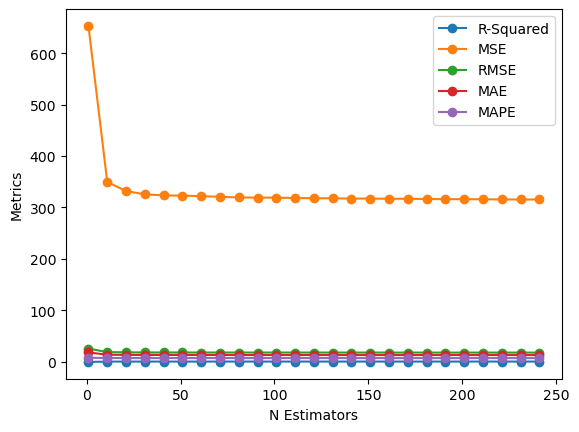

In [10]:
# Plot Metrics
plt.plot(n_estimators, r2_list, marker="o", label="R-Squared")
plt.plot(n_estimators, mse_list, marker="o", label="MSE")
plt.plot(n_estimators, rmse_list, marker="o", label="RMSE")
plt.plot(n_estimators, mae_list, marker="o", label="MAE")
plt.plot(n_estimators, mape_list, marker="o", label="MAPE")
plt.xlabel("N Estimators")
plt.ylabel("Metrics")
plt.legend()

In [11]:
#Find Best n_estimator
best_estimator = n_estimators[np.argmin(rmse_list)]
best_estimator

231

### Max Depth

In [12]:
max_depth = np.arange(1, 30)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [13]:
for i in max_depth:
    # Define Model
    random_forest = RandomForestRegressor(
        random_state=42, n_estimators=best_estimator, max_depth=i
    )
    random_forest.fit(X_train, y_train)

    # Predict
    y_pred = random_forest.predict(X_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = mt.mean_squared_error(y_val, y_pred, squared= False)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

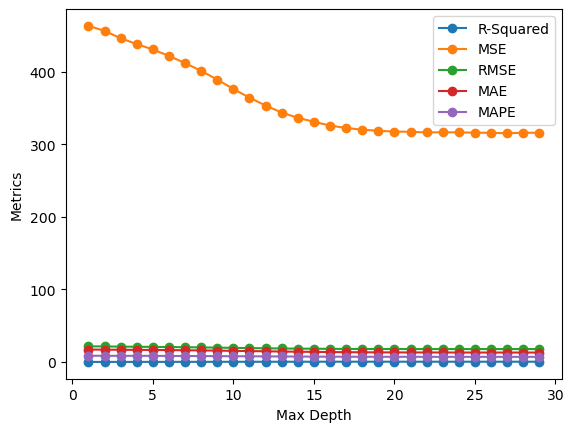

In [14]:
plt.plot(max_depth, r2_list, marker="o", label="R-Squared")
plt.plot(max_depth, mse_list, marker="o", label="MSE")
plt.plot(max_depth, rmse_list, marker="o", label="RMSE")
plt.plot(max_depth, mae_list, marker="o", label="MAE")
plt.plot(max_depth, mape_list, marker="o", label="MAPE")
plt.xlabel("Max Depth")
plt.ylabel("Metrics")
plt.legend()

In [15]:
best_max_depth = max_depth[np.argmin(mse_list)]
best_max_depth

27

In [16]:
# Define Model
random_forest = RandomForestRegressor(
    random_state=42, n_estimators=best_estimator, max_depth=best_max_depth
)
random_forest.fit(
    pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0)
)

# Predict
y_pred_test = random_forest.predict(X_test)

# Performance Metrics
r2_test = mt.r2_score(y_test, y_pred_test)
mse_test = mt.mean_squared_error(y_test, y_pred_test)
rmse_test = mt.mean_squared_error(y_test, y_pred_test, squared= False)
mae_test = mt.mean_absolute_error(y_test, y_pred_test)
mape_test = mt.mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test R2: {r2_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")

Test R2: 0.4039751437786734
Test MSE: 290.2050841471332
Test RMSE: 17.0354067796203
Test MAE: 12.243197863336585
Test MAPE: 6.287762660975762


# 3.0 Results

In [17]:
train_metrics = {
    "Algorithm": "Random Forest Regressor",
    "R2": np.round(r2_train, 3),
    "MSE": np.round(mse_train, 3),
    "RMSE": np.round(rmse_train, 3),
    "MAE": np.round(mae_train, 3),
    "MAPE": np.round(mape_train, 3),
}
validation_metrics = {
    "Algorithm": "Random Forest Regressor",
    "R2": np.round(r2_val, 3),
    "MSE": np.round(mse_val, 3),
    "RMSE": np.round(rmse_val, 3),
    "MAE": np.round(mae_val, 3),
    "MAPE": np.round(mape_val, 3),
}
test_metrics = {
    "Algorithm": "Random Forest Regressor",
    "R2": np.round(r2_test, 3),
    "MSE": np.round(mse_test, 3),
    "RMSE": np.round(rmse_test, 3),
    "MAE": np.round(mae_test, 3),
    "MAPE": np.round(mape_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./reg_train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./reg_validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./reg_test_metrics.csv", mode="a", header=False
)